In [2]:
# Libraries used in this assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# Create our data
num_rows = 0
while (num_rows <= 0):
    # Allows for flexible sample sizes (as long as it's greater than 0)
    num_rows = int(input("How many rows do you want to generate? "))
#np.random.seed(42)

# Randomly generates hours of sunlight assuming there's 12 hours of sunlight in a day
sunlight = np.random.uniform(0, 12, num_rows)

# Randomly generates plant height with influence of sunlight along with noise with +-5
plant_height = 3 * sunlight + np.random.normal(0, 5, num_rows)

# Ensure heights are within a reasonable range
plant_height = np.clip(plant_height, 1, 50)

# Create Dataset
data = pd.DataFrame({'plant_height': plant_height, 'sunlight': sunlight})
print(data)

How many rows do you want to generate? 1000
     plant_height   sunlight
0       14.371949   4.494481
1       27.548993  11.408572
2       28.252771   8.783927
3       24.604634   7.183902
4        8.415623   1.872224
..            ...        ...
995      1.000000   1.098985
996     29.964443  11.007763
997      4.740287   1.641824
998     32.062034  11.402848
999     12.594103   5.352069

[1000 rows x 2 columns]


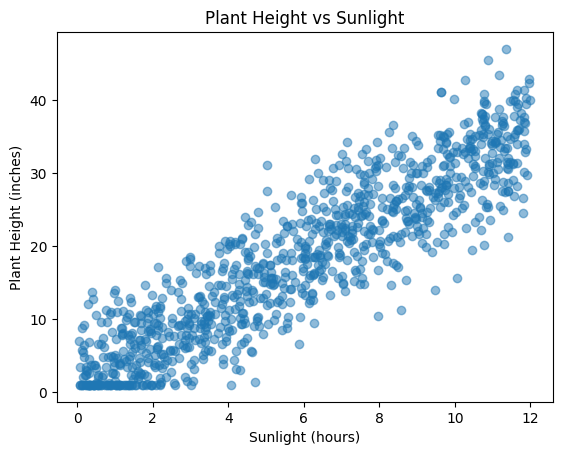

In [4]:
# Visualize the data
plt.scatter(data['sunlight'], data['plant_height'], alpha=0.5)
plt.xlabel("Sunlight (hours)")
plt.ylabel("Plant Height (inches)")
plt.title("Plant Height vs Sunlight")
plt.show()

In [5]:
# Independent variable
X = data[['sunlight']]

# Dependent variable
y = data['plant_height']

# Split dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Fit the model into linear regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
sunlight_input = 0
while(sunlight_input >=0 and sunlight_input <= 12):
    # Asks user for a valid input (0-12)
    sunlight_input = float(input("Enter sunlight hours per day(0-12): "))
    if(sunlight_input >=0 and sunlight_input <= 12):
        # Avoids warning of feature names
        sunlight_df = pd.DataFrame([[sunlight_input]], columns=['sunlight'])
        # Predicts height with linear regression model
        estimated_height = model.predict(sunlight_df)[0]
        # Displays prediction
        print(f"Estimated Plant Height: {estimated_height:.2f} inches")
print("Done")

Enter sunlight hours per day(0-12): 1
Estimated Plant Height: 4.39 inches
Enter sunlight hours per day(0-12): 2
Estimated Plant Height: 7.25 inches
Enter sunlight hours per day(0-12): 3
Estimated Plant Height: 10.10 inches
Enter sunlight hours per day(0-12): 0
Estimated Plant Height: 1.53 inches
Enter sunlight hours per day(0-12): 4
Estimated Plant Height: 12.96 inches
Enter sunlight hours per day(0-12): 5
Estimated Plant Height: 15.82 inches
Enter sunlight hours per day(0-12): 6
Estimated Plant Height: 18.67 inches
Enter sunlight hours per day(0-12): 6
Estimated Plant Height: 18.67 inches
Enter sunlight hours per day(0-12): 6
Estimated Plant Height: 18.67 inches
Enter sunlight hours per day(0-12): 7
Estimated Plant Height: 21.53 inches
Enter sunlight hours per day(0-12): 8
Estimated Plant Height: 24.39 inches
Enter sunlight hours per day(0-12): 9
Estimated Plant Height: 27.25 inches
Enter sunlight hours per day(0-12): 10
Estimated Plant Height: 30.10 inches
Enter sunlight hours per da

In [ ]:
# Generate predictions for the test set
y_pred = model.predict(X_test)

# Plot the actual vs predicted values
plt.scatter(X_test, y_test, color='blue', label='Actual Data', alpha=0.5)
plt.scatter(X_test, y_pred, color='red', label='Predicted Data', alpha=0.5)

plt.xlabel("Sunlight (hours)")
plt.ylabel("Plant Height (inches)")
plt.title("Actual vs Predicted Plant Height")
plt.legend()
plt.show()

In [ ]:
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Print the MSE
print(f"Mean Squared Error (MSE): {mse:.2f}")